In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import multiprocessing as mp
%matplotlib inline

sys.path.append('../')
from helper.scripts import read_fasta,read_pssm_profile

In [2]:
datadir = '../featEngg/offline/pssmMethods/data/pssmProfiles/trainfiles/'

In [3]:
datafiles = [f.name for f in os.scandir(datadir) if f.name.endswith('.pssm')]

In [4]:
m = read_pssm_profile(datadir+datafiles[2])

In [5]:
m

array([['1', 'M', '-7', ..., '0', '4.31', '1.51'],
       ['2', 'P', '2', ..., '1', '1.30', '0.70'],
       ['3', 'L', '-7', ..., '8', '1.89', '0.84'],
       ...,
       ['311', 'A', '2', ..., '1', '0.52', '0.33'],
       ['312', 'V', '4', ..., '11', '0.46', '0.31'],
       ['313', 'A', '6', ..., '0', '1.44', '0.55']], dtype='<U4')

In [10]:
m.shape[0]

313

In [7]:
def func(filename):
    m = read_pssm_profile(datadir+filename)
    return m.shape[0]

In [16]:
pool = mp.Pool(mp.cpu_count())

In [21]:
length_matrix = list(pool.map(func,datafiles))

In [30]:
datafiles_trimmed = [df for df,l in zip(datafiles,length_matrix) if l<1000]

In [31]:
len(datafiles_trimmed)

5785

In [36]:
l_matrix_trimmed = [l for l in length_matrix if (l<600 and l>200)]

(array([310., 460., 544., 647., 578., 445., 433., 429., 381., 254.]),
 array([201. , 240.8, 280.6, 320.4, 360.2, 400. , 439.8, 479.6, 519.4,
        559.2, 599. ]),
 <a list of 10 Patch objects>)

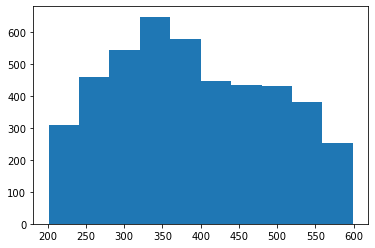

In [37]:
plt.hist(l_matrix_trimmed)

In [42]:
min(l_matrix_trimmed),max(l_matrix_trimmed)

(201, 599)

In [39]:
np.mean(l_matrix_trimmed)

389.4012497210444

In [40]:
np.median(l_matrix_trimmed)

382.0

In [41]:
len(l_matrix_trimmed)

4481